In [16]:
from bs4 import BeautifulSoup # modulo de BeautifulSoup
import urllib.request, urllib.parse, urllib.error
import ssl
import json

# Spyding

The idea is to gather data from the web. We need to first select a web (and its [URL](https://psdeals.net/tr-store)) to extract the data. We need info regarding the price of a game in the Turkey store. At the very beginning, we'll use [this website](https://psdeals.net/tr-store) to construct the data.

In this first step, we will analyze how the website is constructed and how we can obtain mainly the price and the name of the game that we search for.


In [19]:

urls = {
    # Site's url to obtain data
    "tr": "https://psdeals.net/tr-store",
    "us": "https://psdeals.net/us-store"
}
url = urls["tr"]

    # Adding headers to the request: The page could thing i am a bot, so let's suppose we're not... Aren´t we?
req = urllib.request.Request(url, headers={
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive'
})

# Now we have the html!
html = urllib.request.urlopen(req).read()

# Now let's cook the soup!
soup = BeautifulSoup(html, "html.parser")


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


## Step 1: The URL

Doing the search. In this case let's create a tool to search an specific term in the web. Let's suppose that we are interested in searching the name of the game God of War. The main page looks like this:

<img src="../pics/main page.png" alt="Main Page" width="500"/>

But, after we do a search this is the result. Now we need to look at the structure of the URL created to do the search.

<img src="../pics/search-page.png" alt="Search Page" width="500"/>

This means that the url has an standard search ith aprameters added. The standard urls is something like `https://psdeals.net/tr-store/search?search_query=` and the searched item is added to the url separed by a "+" symbol. 

So, with that in mind...


In [40]:
# lets create a function to generate urls of the games that we want to search
def search_games():
    """
    Generates search URLS to the given items.
    
    Args: Games names given by user through console 
    """
    items = []
    game = input("Insert a game (or press enter to finish): ")
    while game != "":
        items.append(game)
        game = input("Insert a game (or press enter to finish): ")

    # Generar las URLs de búsqueda
    base_url = "https://psdeals.net/tr-store/search?search_query="
    urls = []
    for i in items:
        url = base_url + i.replace(" ", "+")
        urls.append(url)
    
    return urls

urls = search_games()
urls

'https://psdeals.net/tr-store'

# Step 2: The Soup

Now that we have the URLs, we can extract the data from the pages.

For this step, we will use the `requests` library to fetch the pages and the `BeautifulSoup` library to parse the HTML.

First, we need to install the required libraries. If you dont have them well... Go on! Do it, and then i'll illustrate you my dear commrade. 

With that being said, let us cook a beautiful Soup!

In [43]:
# With only 1 URL
url = urls[0]
url

'https://psdeals.net/tr-store/search?search_query=god+of+war'

<bound method Tag.prettify of <!DOCTYPE html>
<html lang="es-419"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>dolar a peso colombiano - Buscar con Google</title><script nonce="YJGjPW35mXQIrZLSC2H9ww">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){window.google=window.google||{};var a=window.performance&&window.performance.timing&&"navigationStart"in window.performance.timing,b=google.stvsc&&google.stvsc.ns,c=a?b||window.performance.timing.navigationStar
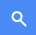

In [15]:
print(soup.prettify)
=SI.CONJUNTO(F4="Email";"02";F4="Printed"; 1;F4="Printed & Email";3)